# IMPORTS

In [34]:
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

# METHOD DEFINITION

In [35]:
size = 15

def plot_simple(x, y):
  global size
  plt.xlabel("Date or sampling")
  plt.ylabel("Stock value")
  plt.title("Stock value history")
  plt.plot(x, y, markersize = size)
  plt.show()

def plot_double(x, y, y_2):
  global size
  plt.xlabel("Date or sampling")
  plt.ylabel("Stock value")
  plt.title("Stock value history")
  plt.plot(x, y, markersize = size)
  plt.plot(x, y_2, markersize = size)
  plt.show()

def plot_data(df):
  global size
  plt.xlabel("Date or sampling")
  plt.ylabel("Stock value")
  plt.title("Stock OPEN value history")
  plt.plot(np.arange(0, len(df.Date)), df.Open, markersize = size)
  plt.title("Stock HIGH value history")
  plt.plot(np.arange(0, len(df.Date)), df.High, markersize = size)
  plt.title("Stock LOW value history")
  plt.plot(np.arange(0, len(df.Date)), df.Low, markersize = size)
  plt.title("Stock CLOSE value history")
  plt.plot(np.arange(0, len(df.Date)), df.Close, markersize = size)
  plt.show()

def load_data(url):
  df = pd.read_csv(url)

# LOAD DATA

In [37]:
#x_train, y_train, x_val, y_val, x_test, y_test = load_data("/content/AAPL.csv")
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
#df = pd.read_csv("/content/AAPL.csv")
df = pd.read_csv("https://raw.githubusercontent.com/ferriitoo/CS584-Machine-Learning/main/project/AAPL.csv?token=GHSAT0AAAAAABZHHPWXNQCRWA6NBQ4PXDUSY3AKPMQ")

df = df.reindex(['Data', 'Volume', 'Open', 'High', 'Low', 'Close', 'Adj Close'], axis=1)
df = df.values
data = df[:, 1:6]
data = scaler.fit_transform(data)
labels = df[:, 6:]
print(data.shape)
print(labels.shape)
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.25)
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(10468, 5)
(10468, 1)
(6280, 5)
(6280, 1)
(2094, 5)
(2094, 1)
(2094, 5)
(2094, 1)


Simple Moving Average

In [48]:
#### Train-Test split for time-series ####
test_ratio = 0.2
training_ratio = 1 - test_ratio

window_size_1 = 50
window_size_2 = 300

df = pd.read_csv("https://raw.githubusercontent.com/ferriitoo/CS584-Machine-Learning/main/project/AAPL.csv?token=GHSAT0AAAAAABZHHPWXNQCRWA6NBQ4PXDUSY3AKPMQ")

train_size = int(training_ratio * len(df))
test_size = int(test_ratio * len(df))
print("train_size: " + str(train_size))
print("test_size: " + str(test_size))

df['SMA_50'] = df['Close'].rolling(window_size_1).mean()
df['SMA_300'] = df['Close'].rolling(window_size_2).mean()

train = df[:train_size][['Date', 'Close', 'SMA_50', 'SMA_300']]
test = df[train_size:][['Date', 'Close', 'SMA_50', 'SMA_300']]


## Split the time-series data into training seq X and output value Y
def extract_seqX_outcomeY(data, N, offset):
    """
    Split time-series into training sequence X and outcome value Y
    Args:
        data - dataset 
        N - window size, e.g., 50 for 50 days of historical stock prices
        offset - position to start the split
    """
    X, y = [], []
    
    for i in range(offset, len(data)):
        X.append(data[i-N:i])
        y.append(data[i])
    
    return np.array(X), np.array(y)

#### Calculate the metrics RMSE and MAPE ####
def calculate_rmse(y_true, y_pred):
    """
    Calculate the Root Mean Squared Error (RMSE)  
    """
    rmse = np.sqrt(np.mean((y_true-y_pred)**2))                   
    return rmse

def calculate_mape(y_true, y_pred): 
    """
    Calculate the Mean Absolute Percentage Error (MAPE) %
    """
    y_pred, y_true = np.array(y_pred), np.array(y_true)    
    mape = np.mean(np.abs((y_true-y_pred) / y_true))*100    
    return mape

class mape():
  pass

class rmse():
  pass


  

train_size: 8374
test_size: 2093


# MODEL

In [39]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(1))

Train the model
:

In [40]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['MSE'])
model.fit(x_train, y_train, epochs=50, batch_size=8, validation_data=(x_val, y_val), verbose=2)

Epoch 1/50
785/785 - 13s - loss: 748.2688 - MSE: 748.2688 - val_loss: 618.7833 - val_MSE: 618.7833 - 13s/epoch - 17ms/step
Epoch 2/50
785/785 - 6s - loss: 467.6018 - MSE: 467.6018 - val_loss: 418.5895 - val_MSE: 418.5895 - 6s/epoch - 7ms/step
Epoch 3/50
785/785 - 6s - loss: 317.4428 - MSE: 317.4428 - val_loss: 284.5520 - val_MSE: 284.5520 - 6s/epoch - 7ms/step
Epoch 4/50
785/785 - 6s - loss: 218.8091 - MSE: 218.8091 - val_loss: 188.7109 - val_MSE: 188.7109 - 6s/epoch - 7ms/step
Epoch 5/50
785/785 - 6s - loss: 146.2838 - MSE: 146.2838 - val_loss: 123.1062 - val_MSE: 123.1062 - 6s/epoch - 7ms/step
Epoch 6/50
785/785 - 6s - loss: 95.6157 - MSE: 95.6157 - val_loss: 76.7572 - val_MSE: 76.7572 - 6s/epoch - 7ms/step
Epoch 7/50
785/785 - 7s - loss: 59.0428 - MSE: 59.0428 - val_loss: 47.7170 - val_MSE: 47.7170 - 7s/epoch - 9ms/step
Epoch 8/50
785/785 - 6s - loss: 41.7925 - MSE: 41.7925 - val_loss: 34.5193 - val_MSE: 34.5193 - 6s/epoch - 7ms/step
Epoch 9/50
785/785 - 6s - loss: 29.8380 - MSE: 29

# PLOT DATA

66/66 [==============================] - 0s 3ms/step
THE MOVING AVERAGE MODEL with window size = 50
MAPE: 5.8
RMSE: 5.82


THE MOVING AVERAGE MODEL with window size = 300
MAPE: 16.19
RMSE: 15.94


THE LONG SHORT TERM MEMORY MODEL with window size = 50
MAPE: 61.57
RMSE: 1.18




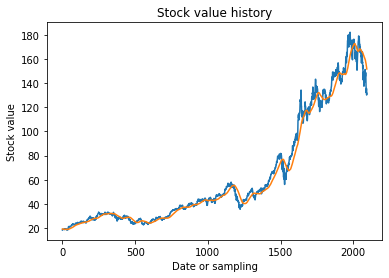

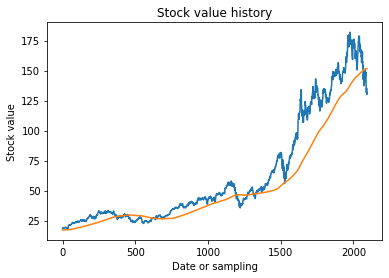

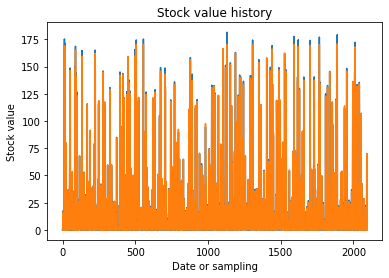

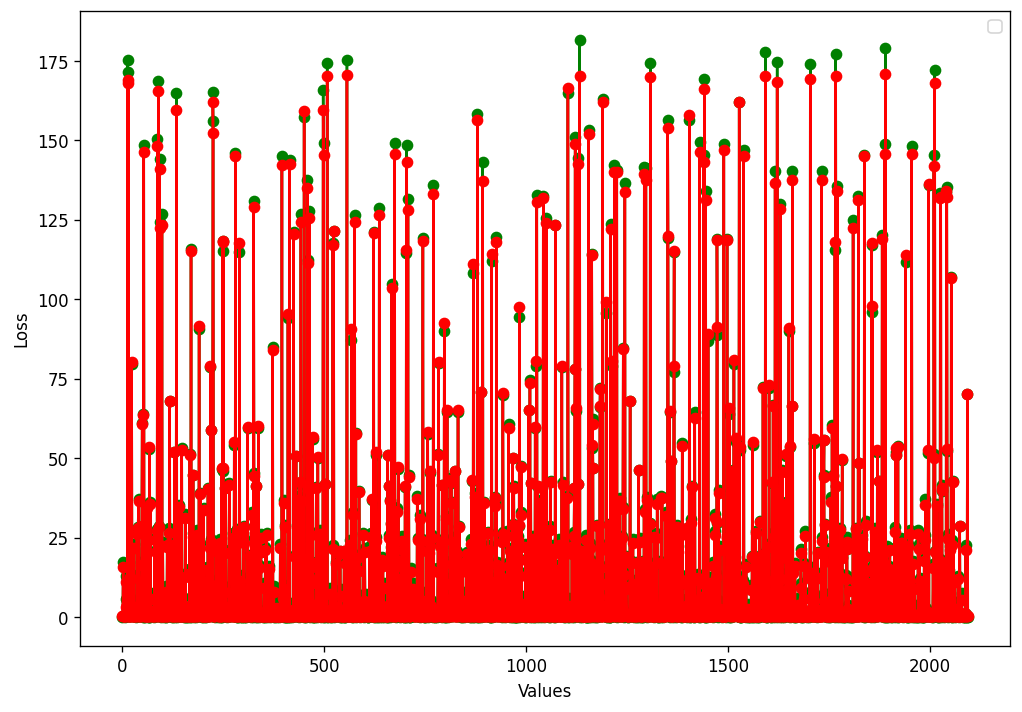

In [50]:
Predicted_data = model.predict(x_test)

#calculating the mape and the rmse for the LSTM model
mape.LSTM = round(calculate_mape(y_test, Predicted_data),2)
rmse.LSTM = round(calculate_rmse(y_test, Predicted_data),2)

#calculating the mape and the rmse for the Moving Average model
mape.SME_50 = round(calculate_mape(test.Close, test.SMA_50), 2)
rmse.SME_50 = round(calculate_rmse(test.Close, test.SMA_50), 2)
mape.SME_300 = round(calculate_mape(test.Close, test.SMA_300), 2)
rmse.SME_300 = round(calculate_rmse(test.Close, test.SMA_300), 2)


#writing down the errors of the different models
print("THE MOVING AVERAGE MODEL with window size = 50")
print("MAPE: {}". format(mape.SME_50))
print("RMSE: {}". format(rmse.SME_50))
print("\n")

print("THE MOVING AVERAGE MODEL with window size = 300")
print("MAPE: {}". format(mape.SME_300))
print("RMSE: {}". format(rmse.SME_300))
print("\n")

print("THE LONG SHORT TERM MEMORY MODEL with window size = 50")
print("MAPE: {}". format(mape.LSTM))
print("RMSE: {}". format(rmse.LSTM))
print("\n")

plot_double(np.arange(0, len(test.Date)), test.Close, test.SMA_50)
plot_double(np.arange(0, len(test.Date)), test.Close, test.SMA_300)
plot_double(np.arange(0, len(Predicted_data)), y_test, Predicted_data)


plt.figure(num=None, figsize=(10, 7), dpi=120, facecolor='w', edgecolor='k')
plt.plot(y_test, color='g', marker='o')
plt.plot(Predicted_data, color='r', marker='o')
plt.xlabel('Values')
plt.ylabel('Loss')
plt.legend(loc='upper right')
